# 4. Plume Analysis

In [7]:
%load_ext autoreload
%autoreload 2

import glob
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plume_learn.plume_utils.viz import show_images, set_labels
from plume_learn.plume_analyzer.PlumeDataset import plume_dataset
from plume_learn.plume_analyzer.Velocity import VelocityCalculator
from m3util.viz.layout import layout_fig, layout_subfigures_inches
from m3util.viz.text import labelfigs, add_text_to_figure
from sro_sto_plume.modify_df import modify_df
from sro_sto_plume.cmap import define_white_viridis
from sro_sto_plume.packed_plot_functions import show_sample_frames, plume_metrics_summary
# from matplotlib import rcParams
# rcParams['font.family'] = 'Courier New'
from m3util.viz.printing import printer
printing = printer(basepath = '../figures/', fileformats=['png', 'svg', 'tif'], dpi=600)

sample_names = ['t1', 't2', 't3', 't4', 't5/s1', 's2']
sample_ids = ['YG065', 'YG066', 'YG067', 'YG068', 'YG069', 'YG063']

plume_recording_root = '../data/Plumes/plume_recordings/'
output_root = '../data/Plumes/plume_metrics/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Plume Frames

../figures/S2-Plume_Sample_Frames-t1.png
../figures/S2-Plume_Sample_Frames-t1.svg
../figures/S2-Plume_Sample_Frames-t1.tif


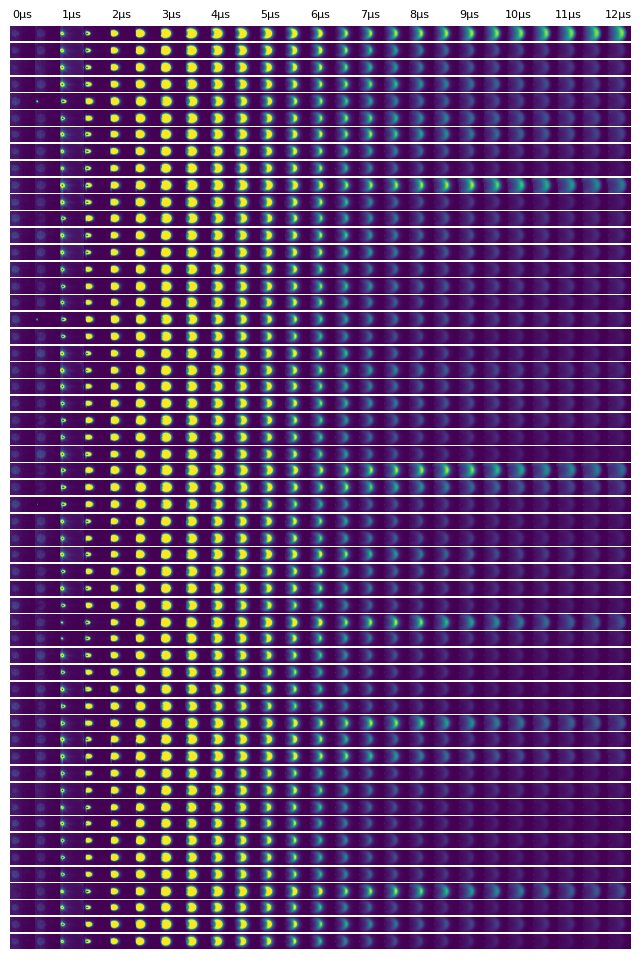

In [15]:
file = f'{plume_recording_root}/YG065_YichenGuo_09102024.h5'
plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
keys = plume_ds.dataset_names()
plumes = plume_ds.load_plumes('1-SrRuO3')
plumes = plumes[plumes.sum(axis=(1,2,3)) >= np.mean(plumes.sum(axis=(1,2,3))) - 3*np.std(plumes.sum(axis=(1,2,3)))] # remove outliers

fig, axes = show_sample_frames(plumes, n_plumes=55, n_frames=25)
printing.savefig(fig, 'S2-Plume_Sample_Frames-t1')
plt.show()

../figures/S3-Plume_Sample_Frames-t2.png
../figures/S3-Plume_Sample_Frames-t2.svg
../figures/S3-Plume_Sample_Frames-t2.tif


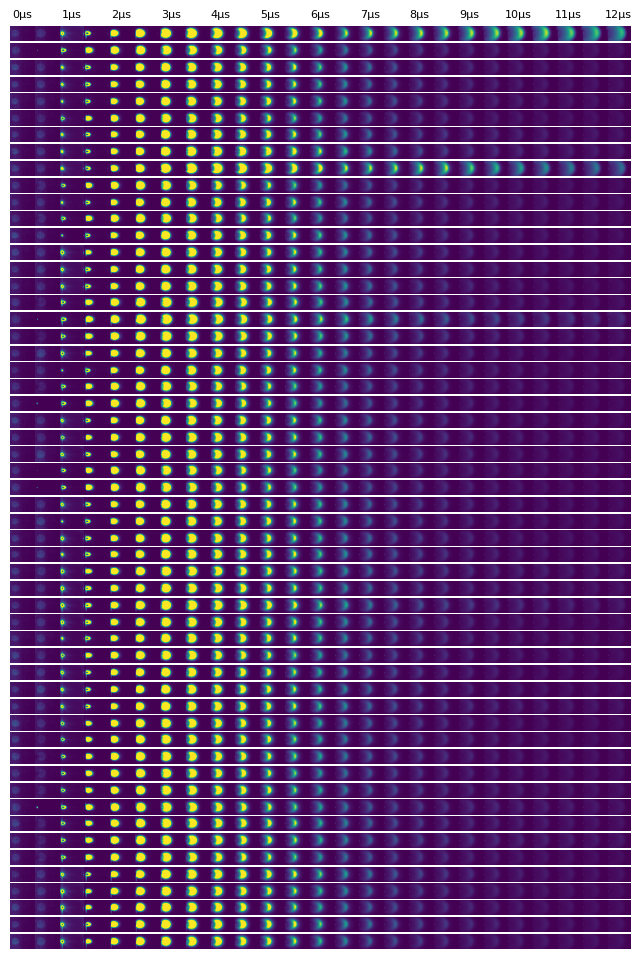

In [16]:
file = f'{plume_recording_root}/YG066_YichenGuo_09112024.h5'
plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
keys = plume_ds.dataset_names()
plumes = plume_ds.load_plumes('1-SrRuO3')
plumes = plumes[plumes.sum(axis=(1,2,3)) >= np.mean(plumes.sum(axis=(1,2,3))) - 3*np.std(plumes.sum(axis=(1,2,3)))] # remove outliers

fig, axes = show_sample_frames(plumes, n_plumes=55, n_frames=25)
printing.savefig(fig, 'S3-Plume_Sample_Frames-t2')
plt.show()

../figures/S4-Plume_Sample_Frames-t3.png
../figures/S4-Plume_Sample_Frames-t3.svg
../figures/S4-Plume_Sample_Frames-t3.tif


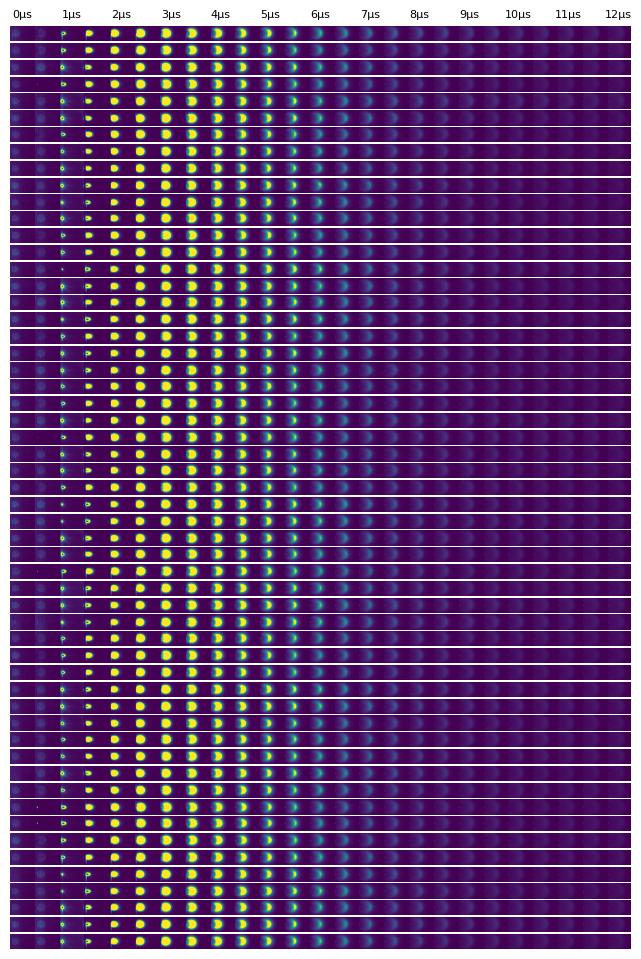

In [17]:
file = f'{plume_recording_root}/YG067_YichenGuo_09122024.h5'
plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
keys = plume_ds.dataset_names()
plumes = plume_ds.load_plumes('1-SrRuO3')
plumes = plumes[plumes.sum(axis=(1,2,3)) >= np.mean(plumes.sum(axis=(1,2,3))) - 3*np.std(plumes.sum(axis=(1,2,3)))] # remove outliers

fig, axes = show_sample_frames(plumes, n_plumes=55, n_frames=25)
printing.savefig(fig, 'S4-Plume_Sample_Frames-t3')
plt.show()

../figures/S5-Plume_Sample_Frames-t4.png
../figures/S5-Plume_Sample_Frames-t4.svg
../figures/S5-Plume_Sample_Frames-t4.tif


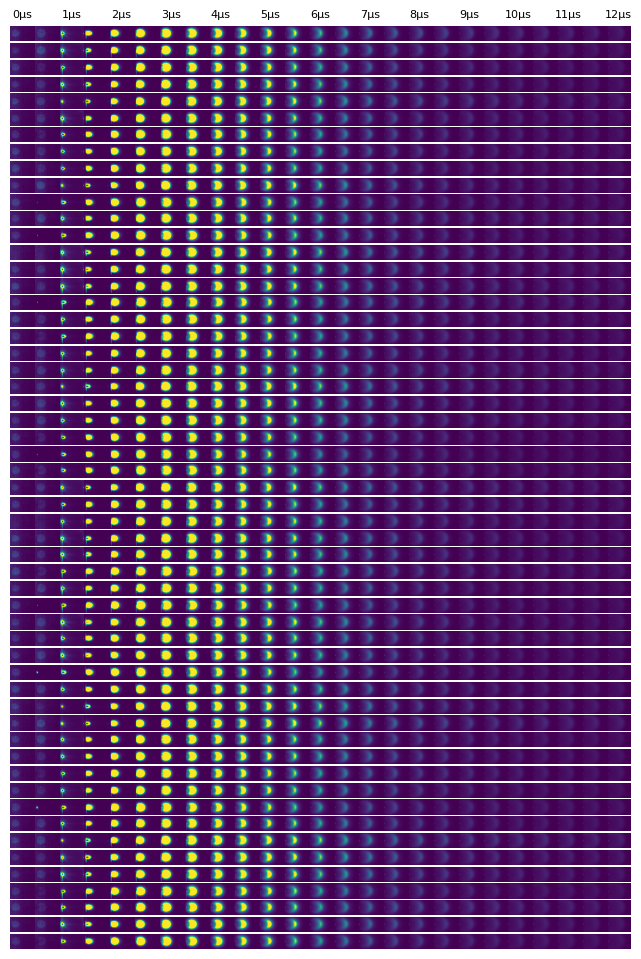

In [18]:
file = f'{plume_recording_root}/YG068_YichenGuo_09132024.h5'
plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
keys = plume_ds.dataset_names()
plumes = plume_ds.load_plumes('1-SrRuO3')
plumes = plumes[plumes.sum(axis=(1,2,3)) >= np.mean(plumes.sum(axis=(1,2,3))) - 3*np.std(plumes.sum(axis=(1,2,3)))] # remove outliers

fig, axes = show_sample_frames(plumes, n_plumes=55, n_frames=25)
printing.savefig(fig, 'S5-Plume_Sample_Frames-t4')
plt.show()

../figures/S6-Plume_Sample_Frames-t5_s1.png
../figures/S6-Plume_Sample_Frames-t5_s1.svg
../figures/S6-Plume_Sample_Frames-t5_s1.tif


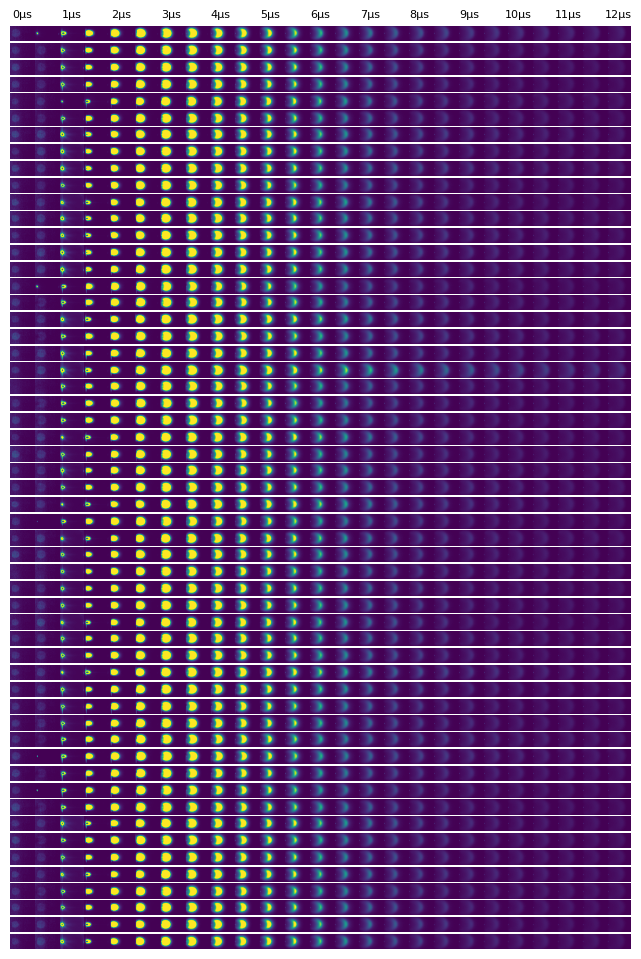

In [19]:
file = f'{plume_recording_root}/YG069_YichenGuo_09152024.h5'
plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
keys = plume_ds.dataset_names()
plumes = plume_ds.load_plumes('1-SrRuO3')
plumes = plumes[plumes.sum(axis=(1,2,3)) >= np.mean(plumes.sum(axis=(1,2,3))) - 3*np.std(plumes.sum(axis=(1,2,3)))] # remove outliers
fig, axes = show_sample_frames(plumes, n_plumes=55, n_frames=25)
printing.savefig(fig, 'S6-Plume_Sample_Frames-t5_s1')
plt.show()

../figures/S7-Plume_Sample_Frames-s2.png
../figures/S7-Plume_Sample_Frames-s2.svg
../figures/S7-Plume_Sample_Frames-s2.tif


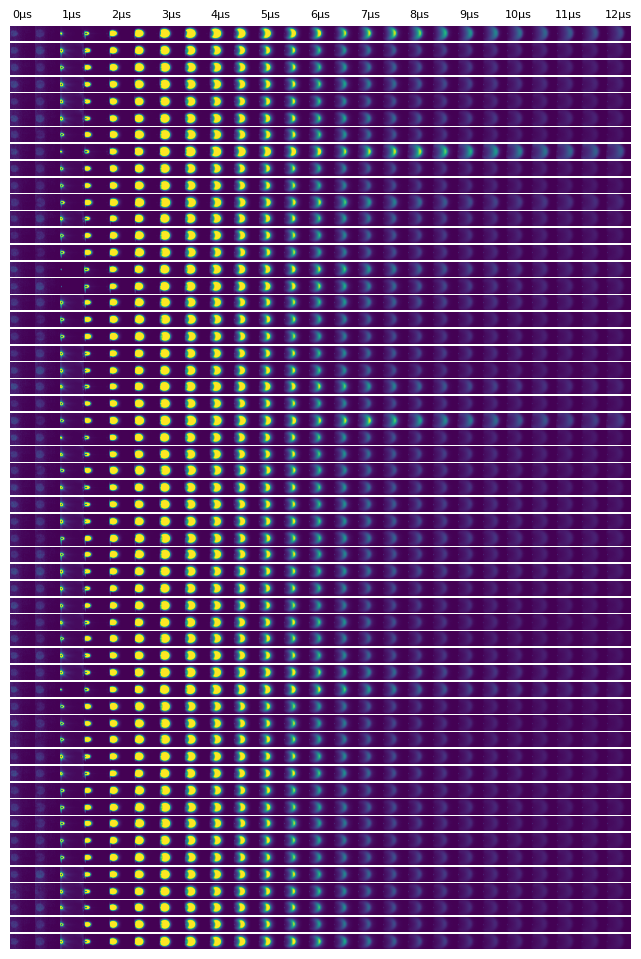

In [20]:
file = f'{plume_recording_root}/YG063_YichenGuo_08042024.h5'
plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
keys = plume_ds.dataset_names()
plumes = plume_ds.load_plumes('1-SrRuO3')
plumes = plumes[plumes.sum(axis=(1,2,3)) >= np.mean(plumes.sum(axis=(1,2,3))) - 3*np.std(plumes.sum(axis=(1,2,3)))] # remove outliers
fig, axes = show_sample_frames(plumes, n_plumes=55, n_frames=25)
printing.savefig(fig, 'S7-Plume_Sample_Frames-s2')
plt.show()

## 2. Introduction to Plume Dynamics Analysis

### 2.1 load metrics for every plume frame

In [21]:
df_frame_metrics = []
for id, sample_name in zip(sample_ids, sample_names):
    file = glob.glob(f'{output_root}/{id}*metrics.csv')[0]
    df = pd.read_csv(file)
    df_processed = modify_df(df)
    df_frame_metrics.append(df_processed)
df_frame_metrics = pd.concat(df_frame_metrics, ignore_index=True)
df_frame_metrics

C:\Users\yig319\AppData\Local\Temp\ipykernel_33324\167744838.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\yig319\AppData\Local\Temp\ipykernel_33324\167744838.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\yig319\AppData\Local\Temp\ipykernel_33324\167744838.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\yig319\AppData\Local\Temp\ipykernel_33324\167744838.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\yig319\AppData\Local\Temp\ipykernel_33324\167744838.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\yig319\AppData\Local\Temp\ipyke

Plume Index  Time (µs)  Distance (m)  Velocity (m/s)  Area (a.u.)  \
0                 0        0.0      0.000000        0.000000          0.0   
1                 0        0.5      0.000000        0.000000          0.0   
2                 0        1.0      0.008715    17429.394813       2074.0   
3                 0        1.5      0.014784    12138.328530       3144.0   
4                 0        2.0      0.021476    13383.285303       9039.0   
...             ...        ...           ...             ...          ...   
280955          377       61.5      0.032836        0.000000          0.0   
280956          377       62.0      0.032836        0.000000          0.0   
280957          377       62.5      0.032836        0.000000          0.0   
280958          377       63.0      0.032836        0.000000          0.0   
280959          377       63.5      0.032836        0.000000          0.0   

       Threshold Sample Name Sample ID  
0            200          t1     YG065  
1            200          t1     YG065  
2            200          t1     YG065  
3            200          t1     YG065  
4            200          t1     YG065  
...          ...         ...       ...  
280955       200          s2     YG063  
280956       200          s2     YG063  
280957       200          s2     YG063  
280958       200          s2     YG063  
280959       200          s2     YG063  

[280960 rows x 8 columns]

### 2.2 calculate max area and incident velocity

In [3]:
# analyze the max area
idx = df_frame_metrics.groupby(['Sample Name', 'Plume Index'])['Area (a.u.)'].idxmax()
df_max_area = df_frame_metrics.loc[idx, ['Sample Name', 'Plume Index', 'Time (µs)', 'Area (a.u.)']].reset_index(drop=True)
df_max_area.rename(columns={'Area (a.u.)': 'Max Area (a.u.)'}, inplace=True)
df_max_area.rename(columns={'Time (µs)': 'Time at Max Area (µs)'}, inplace=True)

# analyze plume Velocity that can be tracked before landing on the substrate
## calculate the velocity between 2.8cm and 2.9cm for the incident velocity
df_filtered = df_frame_metrics[(df_frame_metrics['Distance (m)'] >= 0.028) & (df_frame_metrics['Distance (m)'] <= 0.029)] 
df_unique = df_filtered.drop_duplicates(subset=['Time (µs)', 'Distance (m)', 'Velocity (m/s)', 'Area (a.u.)', 'Threshold'])
incident_Velocity = df_unique.groupby(['Sample Name', 'Plume Index'])['Velocity (m/s)'].mean().reset_index()
incident_Velocity.rename(columns={'Velocity (m/s)': 'Incident Velocity (m/s)'}, inplace=True)

df_plume_metrics = pd.merge(df_max_area, incident_Velocity, on=['Sample Name', 'Plume Index'])
df_plume_metrics.sample(5)

Sample Name  Plume Index  Time at Max Area (µs)  Max Area (a.u.)  \
979       t5/s1          280                    3.0          15972.0   
408          t2          141                    3.0          14575.0   
881       t5/s1           51                    3.0          16277.0   
165          s2          341                    3.0          14850.0   
948       t5/s1          221                    3.0          16113.0   

     Incident Velocity (m/s)  
979              6224.783862  
408              4979.827089  
881              5913.544669  
165              4979.827089  
948              6224.783862

### 2.3 Visualize plume area, distance and velocity

#### Summary plot

C:\Users\yig319\Lehigh University Dropbox\Yichen Guo\SrRuO3_Plume_Dynamics\src\Plume-Learn\src\plume_learn\plume_utils\viz.py:304: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\yig319\Lehigh University Dropbox\Yichen Guo\SrRuO3_Plume_Dynamics\src\Plume-Learn\src\plume_learn\plume_utils\viz.py:304: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


../figures/4-Plume_area_distance_velocity_average.png
../figures/4-Plume_area_distance_velocity_average.svg
../figures/4-Plume_area_distance_velocity_average.tif


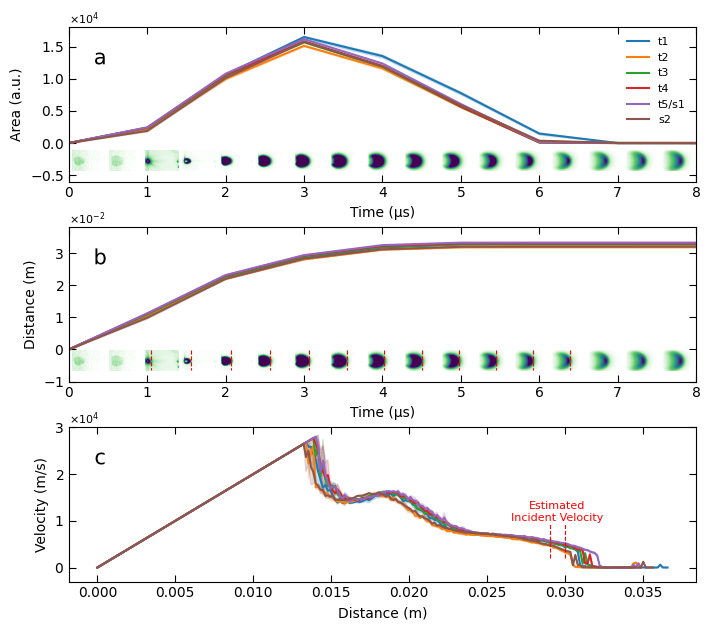

In [ ]:
fig, axes_dict = plume_metrics_summary(df_frame_metrics, plume_recording_root)
printing.savefig(fig, '4-Plume_area_distance_velocity_average')
plt.show()

#### Plume example

In [9]:
file = f'{plume_recording_root}/YG065_YichenGuo_09102024.h5'
plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
keys = plume_ds.dataset_names()
plumes = plume_ds.load_plumes('1-SrRuO3')
plumes = plumes[plumes.sum(axis=(1,2,3)) >= np.mean(plumes.sum(axis=(1,2,3))) - 3*np.std(plumes.sum(axis=(1,2,3)))] # remove outliers

C:\Users\yig319\Lehigh University Dropbox\Yichen Guo\SrRuO3_Plume_Dynamics\src\Plume-Learn\src\plume_learn\plume_utils\viz.py:304: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


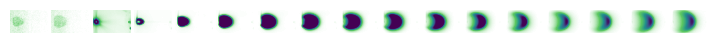

In [10]:
sample_frames = plumes[0][0:17]
labels = np.arange(len(sample_frames))*500e-3
labels = [f'{l:.1f}µs' for l in labels]
labels[0] = 't='+labels[0]
fig, axes = layout_fig(17, mod=17, figsize=(9, 3), subplot_style='gridspec', spacing=(0.1, 0.3), layout='tight')
# fig, axes = layout_fig(17, mod=17, figsize=(8, 1.5), layout='tight')

white_viridis = define_white_viridis()
show_images(sample_frames, labels=None, img_per_row=17, title=None, fig=fig, axes=axes, label_size=8, cmap=white_viridis)
# labelfigs(axes[0], 0, style='bw', loc='tl', size=15,  inset_fraction=(0.4, -0.4))
plt.savefig('../figures/4-Plume_Evolution.svg', bbox_inches='tight', dpi=600, transparent=True)
plt.show()

#### Plume example with plume front labelled

In [10]:
from plume_learn.plume_analyzer.Velocity import VelocityCalculator

coords_root = '../data/Plumes/frame_normalize_dataset/'
coords_path = coords_root + 'YG065_coords.npy'
standard_coords_path = coords_root + 'standard_coords.npy'
coords_standard = np.load(standard_coords_path)
start_position = np.round(np.mean(coords_standard[:2], axis=0)).astype(np.int32) # start position of plume  (x, y)
position_range = np.min(coords_standard[:,0]), np.max(coords_standard[:,0]) # x position range
        
V = VelocityCalculator(start_position, position_range, threshold=200, progress_bar=False)
plume_positions, plume_distances, plume_velocities = V.calculate_distance_area_for_plumes(plumes)

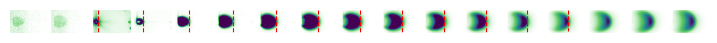

In [11]:
sample_plume_positions = plume_positions[0, :17]
fig, axes = layout_fig(17, mod=17, figsize=(9, 3), subplot_style='gridspec', spacing=(0.1, 0.3), layout='tight')

show_images(sample_frames, labels=None, img_per_row=17, title=None, fig=fig, axes=axes, label_size=8, cmap=white_viridis)
for i, ax in enumerate(axes):
    if np.sum(sample_plume_positions[i]) == 0:
        continue
    x, y = sample_plume_positions[i]
    ax.vlines(x, 0, y*1.8, linestyles='dashed', colors='red', linewidth=0.8, )
    
plt.savefig('../figures/4-Plume_Evolution_position.svg', bbox_inches='tight', dpi=600, transparent=True)
plt.show()

#### Plume metrics

C:\Users\yig319\AppData\Local\Temp\ipykernel_31504\4196600479.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(fontsize=8, frameon=False)


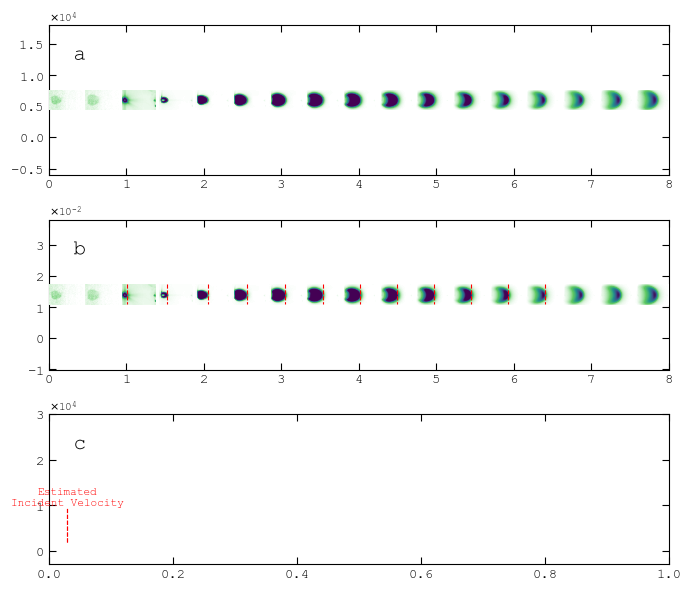

In [ ]:
fig, axes = layout_fig(3, mod=1, figsize=(8, 7), subplot_style='gridspec', spacing=(0, 0.3), layout='tight')

# plume area plot
# df_filtered = df_frame_metrics[df_frame_metrics['Time (µs)'].isin(range(0, 9))]
# lineplot = sns.lineplot(x="Time (µs)", y="Area (a.u.)", hue='Sample Name', data=df_filtered, ax=axes[0])
set_labels(axes[0], yaxis_style='sci', xlim=(0, 8), ylim=(-6000, 18000), legend=False)
axes[0].legend(fontsize=8, frameon=False)
labelfigs(axes=axes[0], number=0 , size=15, style='bw', inset_fraction=(0.2, 0.05))

sample_frames = plumes[0][0:17]
labels = np.arange(len(sample_frames))*500e-3
labels = [f'{l:.1f}µs' for l in labels]
labels[0] = 't='+labels[0]
fig, axes_1 = layout_fig(17, mod=17, figsize=(9, 3), subplot_style='gridspec', spacing=(0.1, 0.3), parent_ax=axes[0], layout='tight')
white_viridis = define_white_viridis()
show_images(sample_frames, labels=None, img_per_row=17, title=None, fig=fig, axes=axes_1, label_size=8, cmap=white_viridis)
# labelfigs(axes[0], 0, style='bw', loc='tl', size=15,  inset_fraction=(0.4, -0.4))
    
# plume position plot
# lineplot = sns.lineplot(x="Time (µs)", y="Distance (m)", hue='Sample Name', data=df_filtered, ax=axes[1])
set_labels(axes[1], yaxis_style='sci', xlim=(0, 8), ylim=(-0.01, 0.038), legend=False)
# axes[1].get_legend().remove()
labelfigs(axes=axes[1], number=1, size=15, style='bw', inset_fraction=(0.2, 0.05))

sample_plume_positions = plume_positions[0, :17]
fig, axes_2 = layout_fig(17, mod=17, figsize=(9, 3), subplot_style='gridspec', spacing=(0.1, 0.3), parent_ax=axes[1], layout='tight')
show_images(sample_frames, labels=None, img_per_row=17, title=None, fig=fig, axes=axes_2, label_size=8, cmap=white_viridis)
for i, ax in enumerate(axes_2):
    if np.sum(sample_plume_positions[i]) == 0:
        continue
    x, y = sample_plume_positions[i]
    ax.vlines(x, 0, y*1.8, linestyles='dashed', colors='red', linewidth=0.8)
    
# plume velocity plot
# lineplot = sns.lineplot(x="Distance (m)", y="Velocity (m/s)", hue='Sample Name', data=df_frame_metrics, ax=axes[2])
set_labels(axes[2], yaxis_style='sci', ylim=(-3000, 30000), legend=False)
# axes[2].get_legend().remove()
labelfigs(axes=axes[2], number=2, size=15, style='bw', inset_fraction=(0.2, 0.05))
axes[2].axvline(x=0.029, color='red', ymin=0.15, ymax=0.38, linestyle='--', linewidth=0.8)
axes[2].axvline(x=0.030, color='red', ymin=0.15, ymax=0.38, linestyle='--', linewidth=0.8)
axes[2].text(0.0295, 1e4, 'Estimated\nIncident Velocity', fontsize=8, color='red', ha='center', bbox=dict(facecolor='none', edgecolor='none'))

printing.savefig(fig, 'S7-Plume_area_distance_velocity_average')
plt.show()

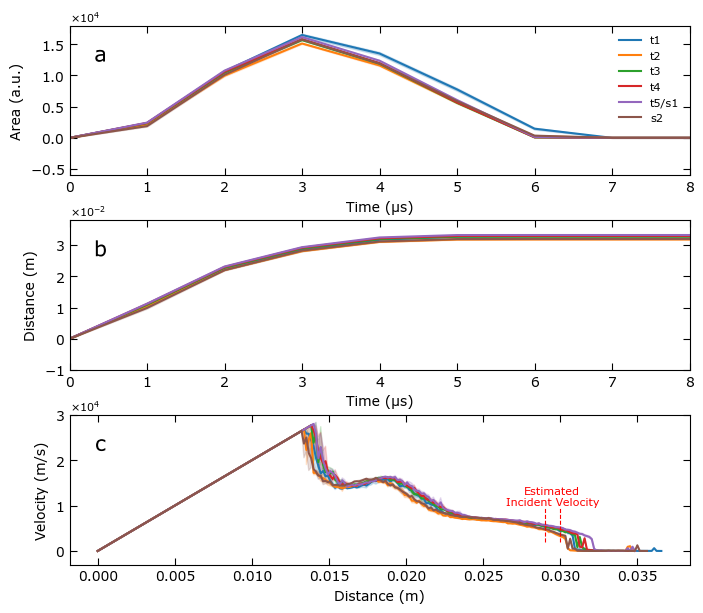

In [ ]:
fig, axes = layout_fig(3, mod=1, figsize=(8, 7), subplot_style='gridspec', spacing=(0, 0.3), layout='tight')
df_filtered = df_frame_metrics[df_frame_metrics['Time (µs)'].isin(range(0, 9))]
lineplot = sns.lineplot(x="Time (µs)", y="Area (a.u.)", hue='Sample Name', data=df_filtered, ax=axes[0])
set_labels(axes[0], yaxis_style='sci', xlim=(0, 8), ylim=(-6000, 18000), legend=False)
axes[0].legend(fontsize=8, frameon=False)
labelfigs(axes=axes[0], number=0 , size=15, style='bw', inset_fraction=(0.2, 0.05))

lineplot = sns.lineplot(x="Time (µs)", y="Distance (m)", hue='Sample Name', data=df_filtered, ax=axes[1])
set_labels(axes[1], yaxis_style='sci', xlim=(0, 8), ylim=(-0.01, 0.038), legend=False)
axes[1].get_legend().remove()
labelfigs(axes=axes[1], number=1, size=15, style='bw', inset_fraction=(0.2, 0.05))

lineplot = sns.lineplot(x="Distance (m)", y="Velocity (m/s)", hue='Sample Name', data=df_frame_metrics, ax=axes[2])
set_labels(axes[2], yaxis_style='sci', ylim=(-3000, 30000), legend=False)
axes[2].get_legend().remove()
labelfigs(axes=axes[2], number=2, size=15, style='bw', inset_fraction=(0.2, 0.05))
axes[2].axvline(x=0.029, color='red', ymin=0.15, ymax=0.38, linestyle='--', linewidth=0.8)
axes[2].axvline(x=0.030, color='red', ymin=0.15, ymax=0.38, linestyle='--', linewidth=0.8)
axes[2].text(0.0295, 1e4, 'Estimated\nIncident Velocity', fontsize=8, color='red', ha='center', bbox=dict(facecolor='none', edgecolor='none'))

plt.savefig('../figures/4-Plume_area_distance_velocity_average.svg', bbox_inches='tight', dpi=1000, transparent=True)
plt.savefig('../figures/4-Plume_area_distance_velocity_average.png', bbox_inches='tight', dpi=1000, transparent=True)
plt.show()

### 2.4 Visualize the plume metric index history

../figures/S9-Plume_area_history.png
../figures/S9-Plume_area_history.svg
../figures/S9-Plume_area_history.tif


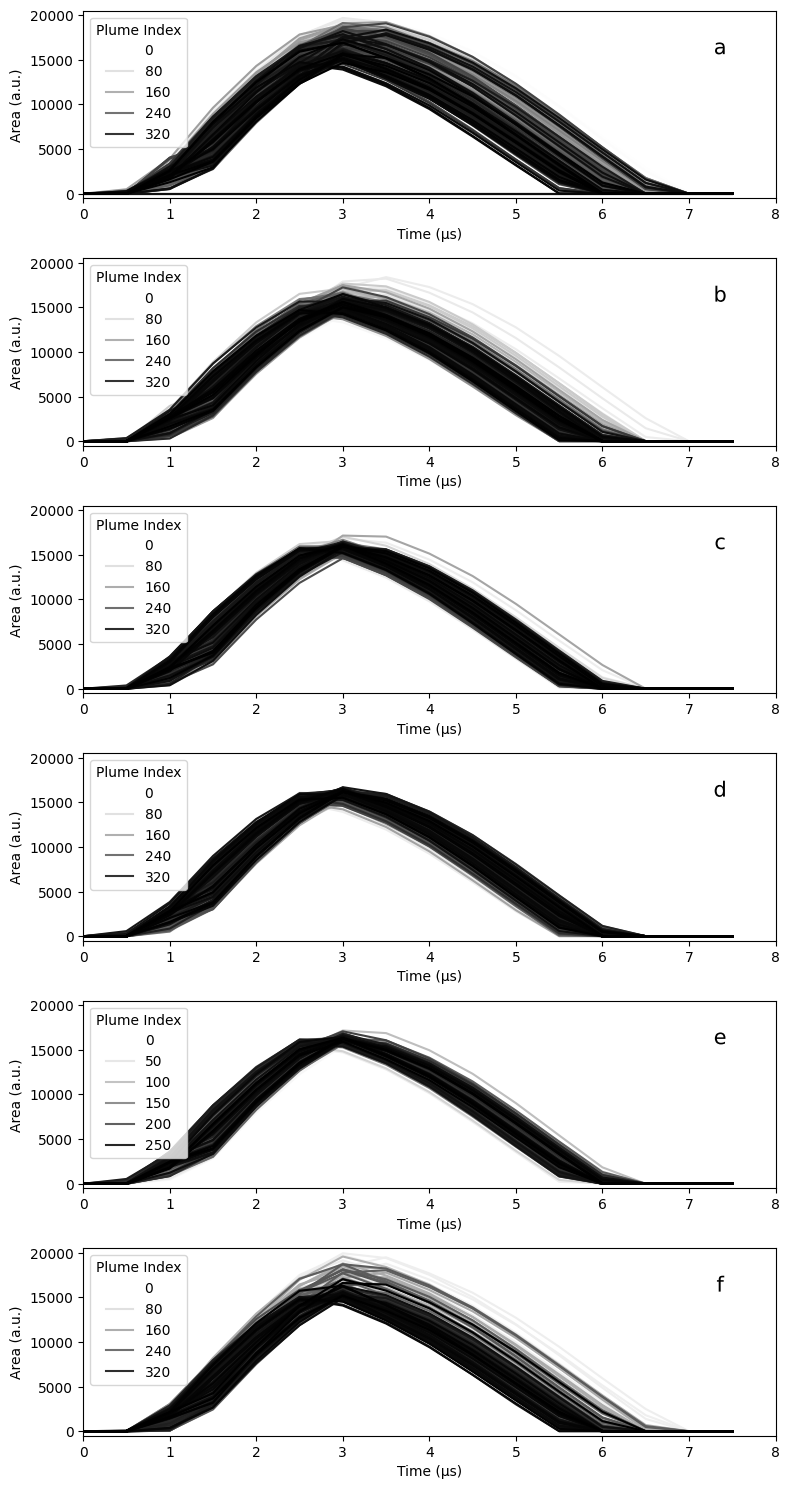

In [27]:
df_sample = df_frame_metrics[(df_frame_metrics['Time (µs)'] >= 0) & (df_frame_metrics['Time (µs)'] < 8)] 

fig, axes = plt.subplots(6, 1, figsize=(8, 2.5*6))
for i, (ax, sample) in enumerate(zip(axes, sample_names)):
    
    # Create the first lineplot
    lineplot1 = sns.lineplot(x="Time (µs)", y="Area (a.u.)", hue="Plume Index", data=df_sample[df_sample['Sample Name'] == sample], ax=ax, palette='Greys')

    # Get the handles and labels specifically for the first plot (Plume Index)
    handles1, labels1 = lineplot1.get_legend().legend_handles, [t.get_text() for t in lineplot1.get_legend().get_texts()]
    legend1 = ax.legend(handles=handles1, labels=labels1, title="Plume Index", loc='upper left')

    ax.set_xlim(0, 8)
    ax.set_ylim(-500, 20500)
    labelfigs(ax, i, style='bw', loc='tr', size=15, inset_fraction=(0.2, 0.08))
    
plt.tight_layout()
printing.savefig(fig, 'S9-Plume_area_history')
plt.show()

../figures/S10-Plume_distance_history.png
../figures/S10-Plume_distance_history.svg
../figures/S10-Plume_distance_history.tif


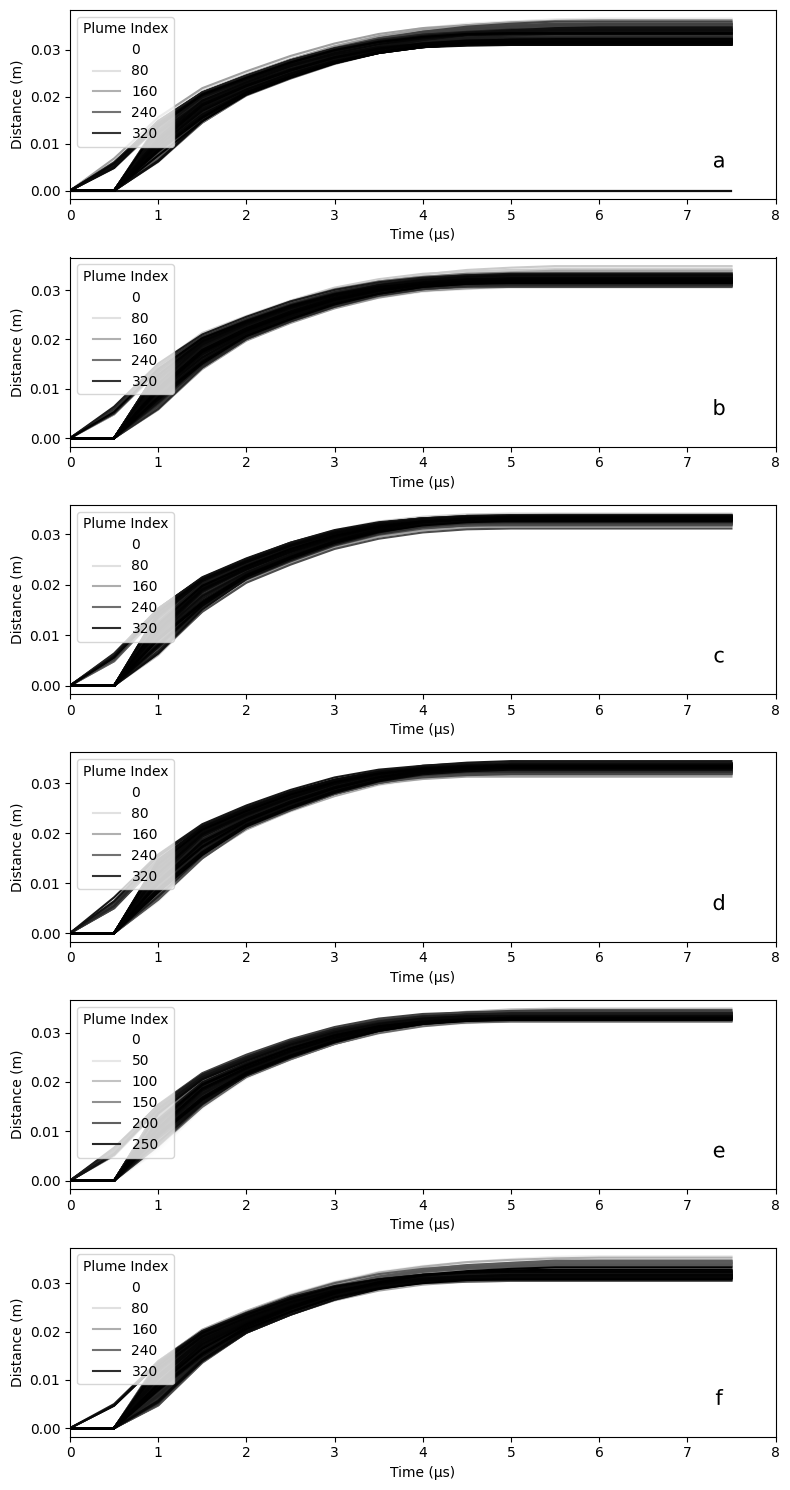

In [26]:
df_sample = df_frame_metrics[(df_frame_metrics['Time (µs)'] >= 0) & (df_frame_metrics['Time (µs)'] < 8)] 

fig, axes = plt.subplots(6, 1, figsize=(8, 2.5*6))
for i, (ax, sample) in enumerate(zip(axes, sample_names)):
    
    # Create the first lineplot
    lineplot1 = sns.lineplot(x="Time (µs)", y="Distance (m)", hue="Plume Index", data=df_sample[df_sample['Sample Name'] == sample], ax=ax, palette='Greys')

    # Get the handles and labels specifically for the first plot (Plume Index)
    handles1, labels1 = lineplot1.get_legend().legend_handles, [t.get_text() for t in lineplot1.get_legend().get_texts()]
    legend1 = ax.legend(handles=handles1, labels=labels1, title="Plume Index", loc='upper left')

    ax.set_xlim(0, 8)
    labelfigs(ax, i, style='bw', loc='br', size=15, inset_fraction=(0.2, 0.08))
    
plt.tight_layout()
printing.savefig(fig, 'S10-Plume_distance_history')
plt.show()

../figures/S11-Plume_velocity_history.png
../figures/S11-Plume_velocity_history.svg
../figures/S11-Plume_velocity_history.tif


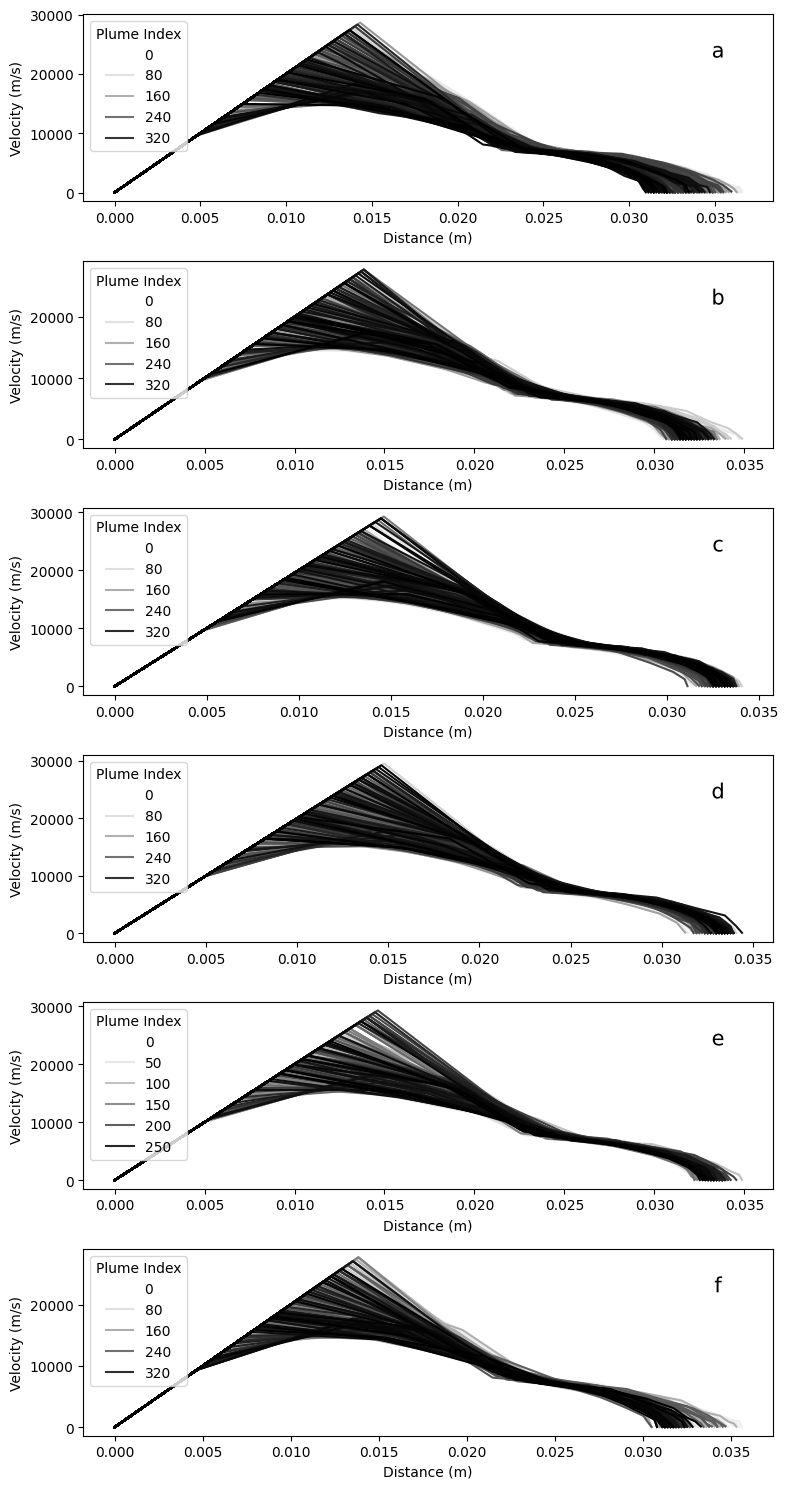

In [28]:
df_sample = df_frame_metrics[(df_frame_metrics['Time (µs)'] >= 0) & (df_frame_metrics['Time (µs)'] < 8)] 

fig, axes = plt.subplots(6, 1, figsize=(8, 2.5*6))
for i, (ax, sample) in enumerate(zip(axes, sample_names)):
    
    # Create the first lineplot
    lineplot1 = sns.lineplot(x="Distance (m)", y="Velocity (m/s)", hue="Plume Index", data=df_sample[df_sample['Sample Name'] == sample], ax=ax, palette='Greys')

    # Get the handles and labels specifically for the first plot (Plume Index)
    handles1, labels1 = lineplot1.get_legend().legend_handles, [t.get_text() for t in lineplot1.get_legend().get_texts()]
    legend1 = ax.legend(handles=handles1, labels=labels1, title="Plume Index", loc='upper left')

    labelfigs(ax, i, style='bw', loc='tr', size=15, inset_fraction=(0.2, 0.08))
    
plt.tight_layout()
printing.savefig(fig, 'S11-Plume_velocity_history')
plt.show()